## ARIMA and SARIMA Forecasting

### ARIMA Modeling and Forecasting

ARIMA (AutoRegressive Integrated Moving Average) forecasting is a time series forecasting method that combines autoregressive (AR), differencing (I), and moving average (MA) components to model and predict future values of a time series.

Here's a brief overview of each component:

1. **AutoRegressive (AR) Component:** This component models the relationship between an observation and a fixed number of lagged observations. The term "autoregressive" indicates that the model is regressing the variable on its own lagged values.

2. **Integrated (I) Component:** This component involves differencing the time series to make it stationary, which means removing any trend or seasonality present in the data. The differencing order (denoted by "d") specifies how many times the data is differenced to achieve stationarity.

3. **Moving Average (MA) Component:** This component models the relationship between an observation and a residual error term based on a moving average of past errors. The term "moving average" refers to the averaging of past error terms in the model.

The ARIMA model is denoted as ARIMA `(p, d, q)`, where:

- `p` represents the order of the autoregressive component (AR).
- `d` represents the degree of differencing needed to make the series stationary.
- `q` represents the order of the moving average component (MA).

The ARIMA model captures time series patterns, including trend, seasonality, and other temporal dependencies. We use the differenced data for the analysis and pass `ARIMA(p, 0, q)`, however, it is first degree differenced. 

<b> Please Note:</b> This is the second notebook and is a continuation. If running on local, create a folder `data` in the working directory and run the <i>Xchange_Rate_Monthly_Analysis</i> notebook to extract and clean the datasets.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
# Retrieving data from the `data` folder created during the analysis
chn_df = pd.read_csv('data/china_finalm.csv', index_col = 'Unnamed: 0')
ind_df = pd.read_csv('data/ind_finalm.csv', index_col = 'Unnamed: 0')
japan_df = pd.read_csv('data/japan_finalm.csv', index_col = 'Unnamed: 0')
euro_df = pd.read_csv('data/euro_finalm.csv', index_col = 'Unnamed: 0')
uk_df = pd.read_csv('data/uk_finalm.csv', index_col = 'Unnamed: 0')

#### Data Literacy

- The dataset consists of the actual exchange rate and the first degree differenced data. 
- We consider the differenced data for modeling and prediction.
- The actual dataset consists of exchange rates till `November 2023`. We split this data into train and test sets for modeling, prediction, forecasting.
- The forecsting is done on the whole dataset and forcasts exchange rate for the next 10 months, i.e., till `September 2024`.
- This allows us to compare the forecasted exchange rates from `December 2023` to `March 2024` and understand how different models are performing.

## Splitting Dataset

Split the dataset into train and test sets 

In [3]:
split_index = int(0.9 * len(euro_df))
euro_train = euro_df['Differenced_Data'].iloc[:split_index]
euro_test = euro_df['Differenced_Data'].iloc[split_index:]

In [4]:
split_index = int(0.9 * len(uk_df))
uk_train = uk_df['Differenced_Data'].iloc[:split_index]
uk_test = uk_df['Differenced_Data'].iloc[split_index:]

In [5]:
split_index = int(0.9 * len(ind_df))
ind_train = ind_df['Differenced_Data'].iloc[:split_index]
ind_test = ind_df['Differenced_Data'].iloc[split_index:]

In [6]:
split_index = int(0.9 * len(japan_df))
japan_train = japan_df['Differenced_Data'].iloc[:split_index]
japan_test = japan_df['Differenced_Data'].iloc[split_index:]

In [7]:
split_index = int(0.9 * len(chn_df))
chn_train = chn_df['Differenced_Data'].iloc[:split_index]
chn_test = chn_df['Differenced_Data'].iloc[split_index:]

### Training ARIMA model

In [8]:
from statsmodels.tsa.arima.model import ARIMA

##### ARIMA Parameters from ACF and PACF

**Euro**: `p = 4`, `q = 1`

**GBP**: `p = 1`, `q = 1`

**INR**: `p = 9`, `q = 9`

**JPY**: `p = 1`, `q = 1`

**CHY**: `p = 2`, `q = 1`

In [9]:
warnings.filterwarnings('ignore')

In [10]:
start = len(euro_train)
end = len(euro_train) + len(euro_test) - 1

In [11]:
euro_model = ARIMA(euro_train, order=(4,0,1))
euro_model_fit = euro_model.fit()
euro_pred = euro_model_fit.predict(start, end)
print(euro_pred)

2022-12-01   -0.009743
2023-01-01   -0.001368
2023-02-01    0.005646
2023-03-01   -0.001089
2023-04-01   -0.000579
2023-05-01   -0.000275
2023-06-01    0.002040
2023-07-01    0.001776
2023-08-01    0.001828
2023-09-01    0.001557
2023-10-01    0.001883
2023-11-01    0.001950
Freq: MS, Name: predicted_mean, dtype: float64


In [12]:
uk_model = ARIMA(uk_train, order=(1,0,1))
uk_model_fit = uk_model.fit()
uk_pred = uk_model_fit.predict(start, end)
print(uk_pred)

2022-12-01   -0.001085
2023-01-01    0.000432
2023-02-01    0.001253
2023-03-01    0.001696
2023-04-01    0.001936
2023-05-01    0.002066
2023-06-01    0.002136
2023-07-01    0.002174
2023-08-01    0.002195
2023-09-01    0.002206
2023-10-01    0.002212
2023-11-01    0.002215
Freq: MS, Name: predicted_mean, dtype: float64


In [13]:
ind_model = ARIMA(ind_train, order=(9,0,9))
ind_model_fit = ind_model.fit()
ind_pred = ind_model_fit.predict(start, end)
print(ind_pred)

2022-12-01   -0.325675
2023-01-01    0.323598
2023-02-01   -0.416262
2023-03-01   -0.572413
2023-04-01   -1.015590
2023-05-01   -0.003385
2023-06-01   -0.006120
2023-07-01   -0.717535
2023-08-01    0.054139
2023-09-01    0.172261
2023-10-01   -0.125971
2023-11-01   -0.274468
Freq: MS, Name: predicted_mean, dtype: float64


In [14]:
japan_model = ARIMA(japan_train, order=(1,0,1))
japan_model_fit = japan_model.fit()
japan_pred = japan_model_fit.predict(start, end)
print(japan_pred)

2022-12-01   -0.590643
2023-01-01   -0.152420
2023-02-01    0.078504
2023-03-01    0.200192
2023-04-01    0.264316
2023-05-01    0.298106
2023-06-01    0.315912
2023-07-01    0.325296
2023-08-01    0.330240
2023-09-01    0.332846
2023-10-01    0.334219
2023-11-01    0.334942
Freq: MS, Name: predicted_mean, dtype: float64


In [15]:
chn_model = ARIMA(chn_train, order=(2,0,1))
chn_model_fit = chn_model.fit()
chn_pred = chn_model_fit.predict(start, end)
print(chn_pred)

2022-12-01    0.000243
2023-01-01   -0.000023
2023-02-01   -0.000175
2023-03-01   -0.000230
2023-04-01   -0.000244
2023-05-01   -0.000246
2023-06-01   -0.000246
2023-07-01   -0.000245
2023-08-01   -0.000245
2023-09-01   -0.000245
2023-10-01   -0.000245
2023-11-01   -0.000245
Freq: MS, Name: predicted_mean, dtype: float64


#### Visualizating the Model Predictions

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

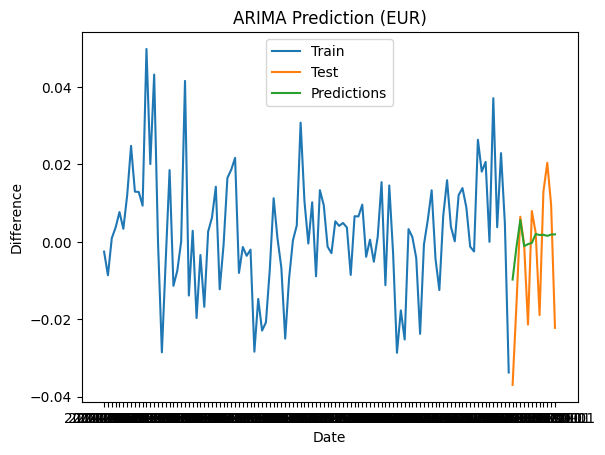

In [17]:
euro_pred_df = pd.DataFrame(euro_pred)
euro_pred_df.index = euro_pred_df.index.astype(str)
plt.plot(euro_train, label='Train')
plt.plot(euro_test, label='Test')
plt.plot(euro_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (EUR)')
plt.legend()
plt.show()

In [18]:
mae_euro = mean_absolute_error(euro_test, euro_pred_df)
mse_euro = mean_squared_error(euro_test, euro_pred_df)
rmse_euro = np.sqrt(mean_squared_error(euro_test, euro_pred_df))
euro_perf = {'Currency':'Euro','MAE': mae_euro, 'MSE': mse_euro,
'RMSE': rmse_euro}
euro_perf = pd.DataFrame([euro_perf])
euro_perf

,Currency,MAE,MSE,RMSE
0,Euro,0.012929,0.000251,0.015857


#### Interpretation

<b>From Plot:</b> We observe that the model captures some of the trend, however, the actual observations (test) is varying not as expected by the predicted observations.

<b>From Performance Metrics</b>: The error values are all very small `(RMSE < 0.1)`, indicating that the model successfully captured the trend in the dataset and is reliable.

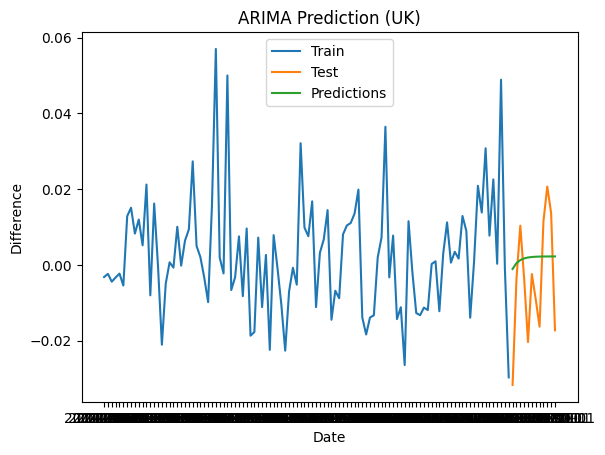

In [19]:
uk_pred_df = pd.DataFrame(uk_pred)
uk_pred_df.index = uk_pred_df.index.astype(str)
plt.plot(uk_train, label='Train')
plt.plot(uk_test, label='Test')
plt.plot(uk_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (UK)')
plt.legend()
plt.show()

In [20]:
mae_uk = mean_absolute_error(uk_test, uk_pred_df)
mse_uk = mean_squared_error(uk_test, uk_pred_df)
rmse_uk = np.sqrt(mean_squared_error(uk_test, uk_pred_df))
uk_perf = {'Currency':'UK Pound','MAE': mae_uk, 'MSE': mse_uk,
'RMSE': rmse_uk}
uk_perf = pd.DataFrame([uk_perf])
uk_perf

,Currency,MAE,MSE,RMSE
0,UK Pound,0.013713,0.000249,0.015792


#### Interpretation

<b>From Plot:</b> We observe that the model does not capture the trend, and the actual observations (test) is varying too much from the predicted observations. However, we have to consider that the scale along the `y-axis` is small and we should not conclude based on that.

<b>From Performance Metrics</b>: The error values are all very small `(RMSE < 0.1)`, indicating that the model successfully captured the trend in the dataset and is reliable, unlike the observation from the graph!

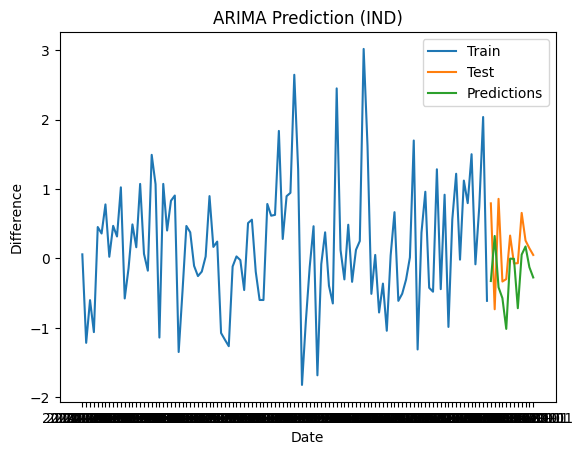

In [21]:
ind_pred_df = pd.DataFrame(ind_pred)
ind_pred_df.index = ind_pred_df.index.astype(str)
plt.plot(ind_train[:split_index], label='Train')
plt.plot(ind_test, label='Test')
plt.plot(ind_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (IND)')
plt.legend()
plt.show()

In [22]:
mae_ind = mean_absolute_error(ind_test, ind_pred_df)
mse_ind = mean_squared_error(ind_test, ind_pred_df)
rmse_ind = np.sqrt(mean_squared_error(ind_test, ind_pred_df))
ind_perf = {'Currency':'Indian Rupees','MAE': mae_ind, 'MSE': mse_ind,
'RMSE': rmse_ind}
ind_perf = pd.DataFrame([ind_perf])
ind_perf

,Currency,MAE,MSE,RMSE
0,Indian Rupees,0.56154,0.470815,0.68616


#### Interpretation

<b>From Plot:</b> We observe that the model captures the trend very well, however, it looks like there is a downward shift in the predicted results.

<b>From Performance Metrics</b>: The error values are small `(RMSE < 1)`, indicating that the model captured the trend in the dataset and is reliable. However, we cannot compare this with the previous currencies (Euro and GBP) as the value ranges are different. 

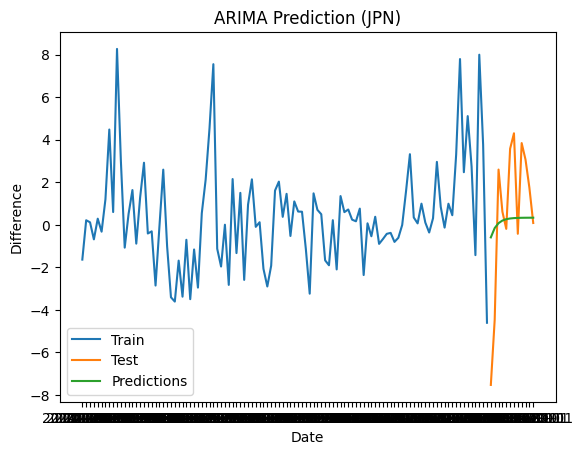

In [23]:
jap_pred_df = pd.DataFrame(japan_pred)
jap_pred_df.index = jap_pred_df.index.astype(str)
plt.plot(japan_train[:split_index], label='Train')
plt.plot(japan_test, label='Test')
plt.plot(jap_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (JPN)')
plt.legend()
plt.show()

In [24]:
mae_jap = mean_absolute_error(japan_test, jap_pred_df)
mse_jap = mean_squared_error(japan_test, jap_pred_df)
rmse_jap = np.sqrt(mean_squared_error(japan_test, jap_pred_df))
jap_perf = {'Currency':'Japanese Yen','MAE': mae_jap, 'MSE': mse_jap,
'RMSE': rmse_jap}
jap_perf = pd.DataFrame([jap_perf])
jap_perf

,Currency,MAE,MSE,RMSE
0,Japanese Yen,2.547739,10.217898,3.196545


#### Interpretation

<b>From Plot:</b> We observe that the model captures the trend very well expect for some unexpected dip in the actual observation.

<b>From Performance Metrics</b>: The error values are larger than`(RMSE > 1)`, indicating that the model tend to have higher prediction errors. 

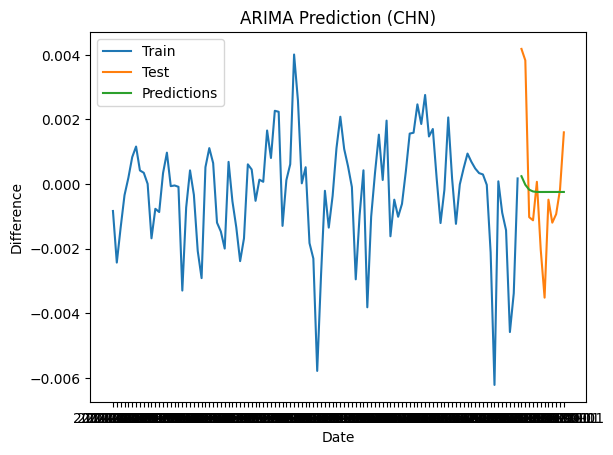

In [25]:
chn_pred_df = pd.DataFrame(chn_pred)
chn_pred_df.index = chn_pred_df.index.astype(str)
plt.plot(chn_train[:split_index], label='Train')
plt.plot(chn_test, label='Test')
plt.plot(chn_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (CHN)')
plt.legend()
plt.show()

In [26]:
mae_chn = mean_absolute_error(chn_test, chn_pred_df)
mse_chn = mean_squared_error(chn_test, chn_pred_df)
rmse_chn = np.sqrt(mean_squared_error(chn_test, chn_pred_df))
chn_perf = {'Currency':'Chinese Yuan','MAE': mae_chn, 'MSE': mse_chn,
'RMSE': rmse_chn}
chn_perf = pd.DataFrame([chn_perf])
chn_perf

,Currency,MAE,MSE,RMSE
0,Chinese Yuan,0.001559,0.000004,0.002056


#### Interpretation

<b>From Plot:</b> We observe that the model does not capture the trend, and the actual observations (test) is varying too much from the predicted observations. However, we have to consider that the scale along the `y-axis` is very small and we should not conclude based on that.

<b>From Performance Metrics</b>: The error values are all very small `(RMSE < 0.01)`, indicating that the model successfully captured the trend in the dataset and is reliable, unlike the observation from the graph!

### ARIMA Forecasting

In [27]:
forecast_index = pd.date_range(start = '2023-12-01', periods =10, freq = 'MS')

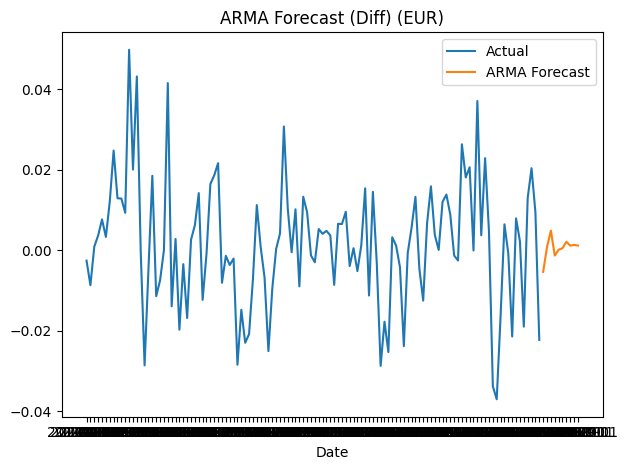

In [28]:
euro = ARIMA(euro_df['Differenced_Data'], order = (4, 0, 1))
euro_model = euro.fit()
euro_forecast = euro_model.forecast(steps=10)
euro_forecast.index = forecast_index.astype(str)
plt.plot(euro_df['Differenced_Data'][:], label='Actual')
plt.plot(euro_forecast, label='ARMA Forecast')
plt.title('ARMA Forecast (Diff) (EUR)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
euro_forecast_rates = euro_df['Exchange_rate'].iloc[-1] + euro_forecast.cumsum()
euro_forecasts = pd.concat([euro_df['Exchange_rate'], euro_forecast_rates], axis = 0)
euro_forecasts.to_csv('data/euro_arima_forecasts.csv')

In [30]:
euro_forecasts

2014-02-01    0.731797
2014-03-01    0.723170
2014-04-01    0.724113
2014-05-01    0.727855
2014-06-01    0.735565
                ...   
2024-05-01    0.924305
2024-06-01    0.926456
2024-07-01    0.927666
2024-08-01    0.929046
2024-09-01    0.930268
Length: 128, dtype: float64

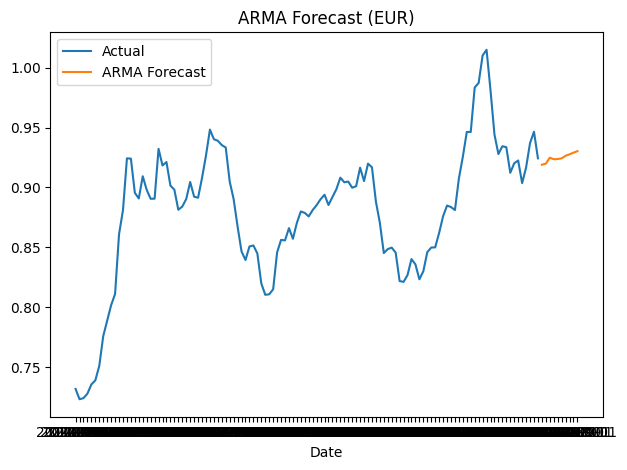

In [31]:
plt.plot(euro_df['Exchange_rate'][:], label='Actual')
plt.plot(euro_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (EUR)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The forecasting predicts that the USD might experience a slight ascend in value against EURO after a noticeable dip in December 2023 until September 2024.

Also. the model forecasts a slight dip in February 2024, but does not seem like a part of the trend, rather an outlier.

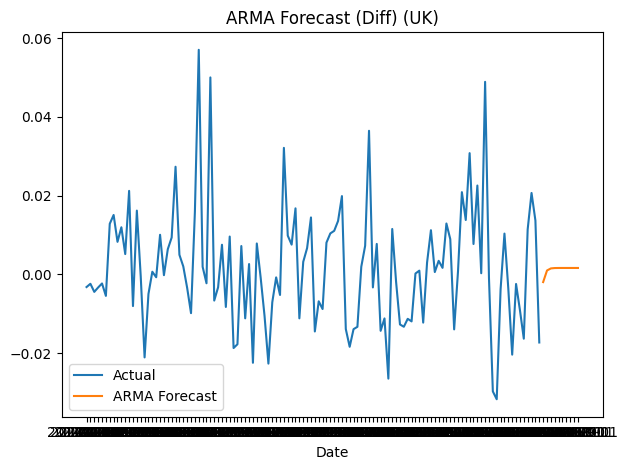

In [32]:
uk = ARIMA(uk_df['Differenced_Data'], order = (1,0,1))
uk_model = uk.fit()
uk_forecast = uk_model.forecast(steps=10)
uk_forecast.index = forecast_index.astype(str)
plt.plot(uk_df['Differenced_Data'][:], label='Actual')
plt.plot(uk_forecast, label='ARMA Forecast')
plt.title('ARMA Forecast (Diff) (UK)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
uk_forecast_rates = uk_df['Exchange_rate'].iloc[-1] + uk_forecast.cumsum()
uk_forecasts = pd.concat([uk_df['Exchange_rate'], uk_forecast_rates], axis = 0)
uk_forecasts.to_csv('data/uk_arima_forecasts.csv')

In [34]:
uk_forecasts

2014-02-01    0.603938
2014-03-01    0.601540
2014-04-01    0.597086
2014-05-01    0.593754
2014-06-01    0.591436
                ...   
2024-05-01    0.809403
2024-06-01    0.811020
2024-07-01    0.812638
2024-08-01    0.814255
2024-09-01    0.815872
Length: 128, dtype: float64

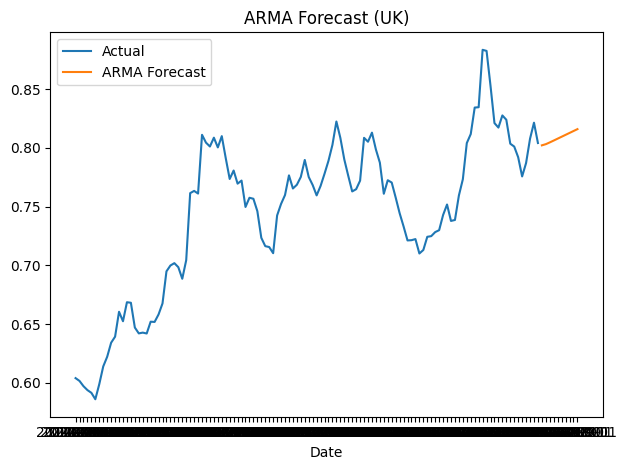

In [35]:
plt.plot(uk_df['Exchange_rate'][:], label='Actual')
plt.plot(uk_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (UK)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The USD tends to have a steady ascend against GBP from December 2023 to September 2024 without any fluctuation in the pattern.

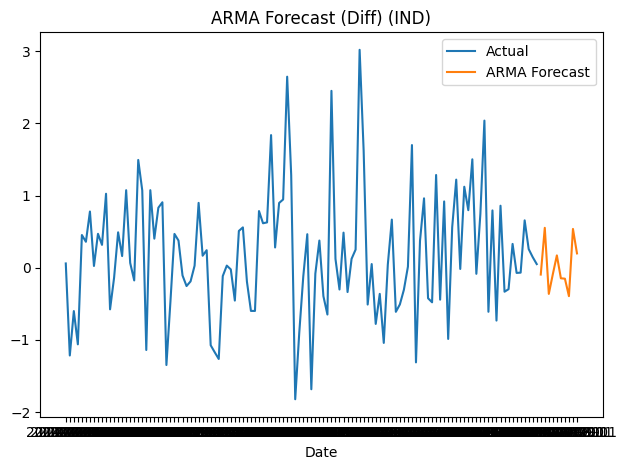

In [36]:
ind = ARIMA(ind_df['Differenced_Data'], order = (9,0,9))
ind_model = ind.fit()
ind_forecast = ind_model.forecast(steps=10)
ind_forecast.index = forecast_index.astype(str)
plt.plot(ind_df['Differenced_Data'][:], label='Actual')
plt.plot(ind_forecast, label='ARMA Forecast')
plt.title('ARMA Forecast (Diff) (IND)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
ind_forecast_rates = ind_df['Exchange_rate'].iloc[-1] + ind_forecast.cumsum()
ind_forecasts = pd.concat([ind_df['Exchange_rate'], ind_forecast_rates], axis = 0)
ind_forecasts.to_csv('data/ind_arima_forecasts.csv')

In [38]:
ind_forecasts

2014-02-01    62.164200
2014-03-01    60.947600
2014-04-01    60.346400
2014-05-01    59.284300
2014-06-01    59.736700
                ...    
2024-05-01    83.293216
2024-06-01    83.140850
2024-07-01    82.746579
2024-08-01    83.283268
2024-09-01    83.481020
Length: 128, dtype: float64

In [39]:
euro_df['Exchange_rate'].iloc[-1]

0.9242998428690268

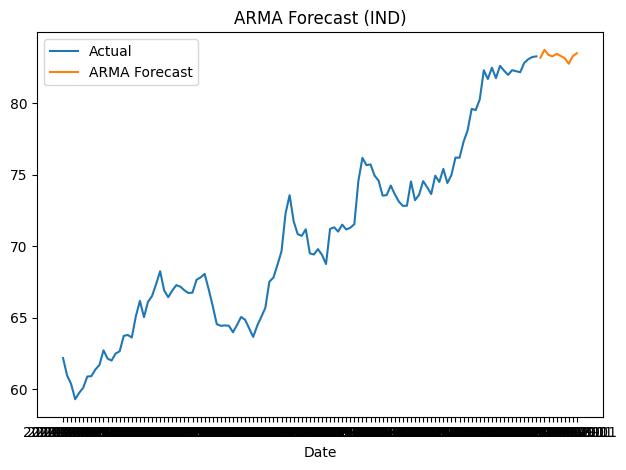

In [40]:
plt.plot(ind_df['Exchange_rate'][:], label='Actual')
plt.plot(ind_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (IND)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The forecasting shows that the USD currency value tends to remain steady as compared to INR over the next 10 months from December 2023. 

However, there are continuous ups and downs in the value maintaining a constant mean for the forecasted 10 months

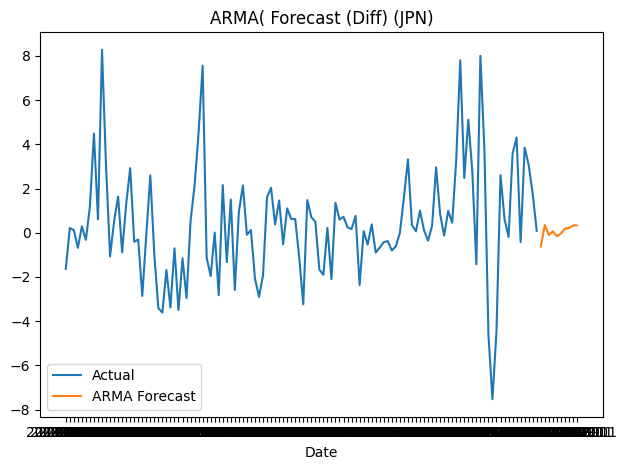

In [41]:
jap = ARIMA(japan_df['Differenced_Data'], order = (7,0,2))
japan_model = jap.fit()
jap_forecast = japan_model.forecast(steps=10)
jap_forecast.index = forecast_index.astype(str)
plt.plot(japan_df['Differenced_Data'][:], label='Actual')
plt.plot(jap_forecast, label='ARMA Forecast')
plt.title('ARMA( Forecast (Diff) (JPN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
japan_forecast_rates = japan_df['Exchange_rate'].iloc[-1] + jap_forecast.cumsum()
japan_forecasts = pd.concat([japan_df['Exchange_rate'], japan_forecast_rates], axis = 0)
japan_forecasts.to_csv('data/japan_arima_forecasts.csv')

In [43]:
japan_forecasts

2014-02-01    102.125300
2014-03-01    102.339500
2014-04-01    102.458200
2014-05-01    101.773800
2014-06-01    102.062900
                 ...    
2024-05-01    149.167015
2024-06-01    149.348712
2024-07-01    149.562904
2024-08-01    149.890594
2024-09-01    150.219993
Length: 128, dtype: float64

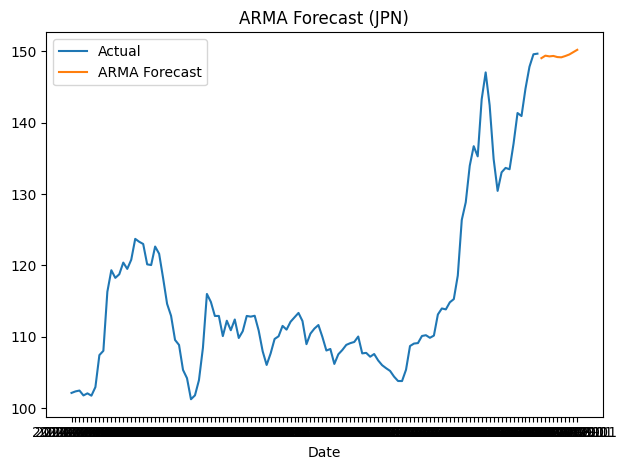

In [44]:
plt.plot(japan_df['Exchange_rate'][:], label='Actual')
plt.plot(japan_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (JPN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The US Dollars tend to have a stable phase against Japanese Yen for the next 10 months from December 2023, with a slight ascending in value in the last 4 months of the forecasting horizon. 

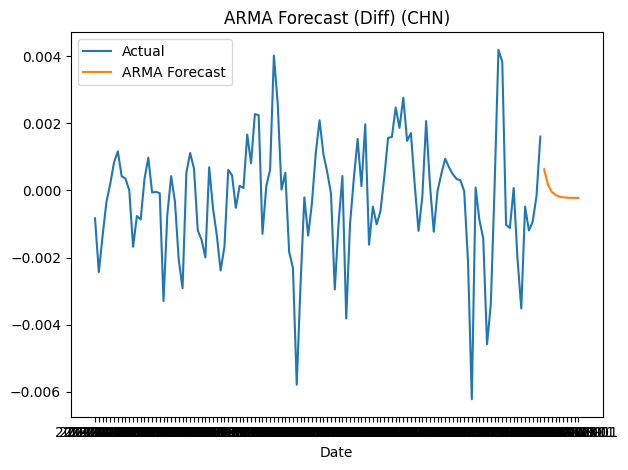

In [45]:
chn = ARIMA(chn_df['Differenced_Data'], order = (1,0,0))
chn_model = chn.fit()
chn_forecast = chn_model.forecast(steps=10)
chn_forecast.index = forecast_index.astype(str)
plt.plot(chn_df['Differenced_Data'][:], label='Actual')
plt.plot(chn_forecast, label='ARMA Forecast')
plt.title('ARMA Forecast (Diff) (CHN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
chn_forecast_rates = chn_df['Exchange_rate'].iloc[-1] + chn_forecast.cumsum()
chn_forecasts = pd.concat([chn_df['Exchange_rate'], chn_forecast_rates], axis = 0)
chn_forecasts.to_csv('data/chn_arima_forecasts.csv')

In [47]:
chn_forecasts

2014-02-01    0.164430
2014-03-01    0.161998
2014-04-01    0.160653
2014-05-01    0.160308
2014-06-01    0.160498
                ...   
2024-05-01    0.138674
2024-06-01    0.138456
2024-07-01    0.138233
2024-08-01    0.138008
2024-09-01    0.137782
Length: 128, dtype: float64

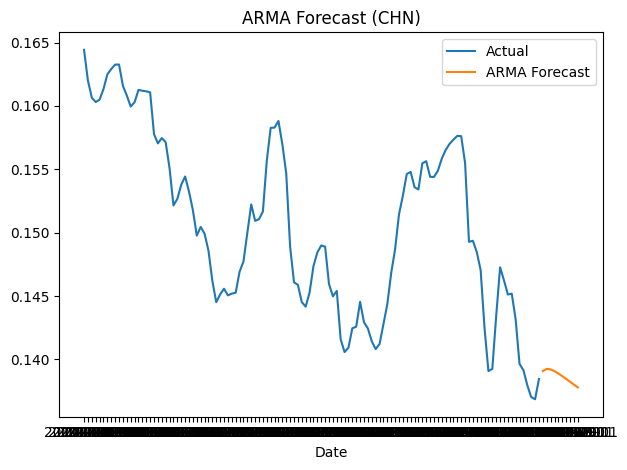

In [48]:
plt.plot(chn_df['Exchange_rate'][:], label='Actual')
plt.plot(chn_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (CHN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The value of US Dollars will suffer a drop against Chinese Yuan after attaining a local maximum in January 2024 until September 2024. This shows that Chinese Yuan will have a growth phase during this time period.

### SARIMA Modeling & Forecasting

In SARIMA (Seasonal AutoRegressive Integrated Moving Average) forecasting, the seasonal order refers to the seasonal components of the model. Specifically, it includes the seasonal autoregressive (SAR), seasonal differencing (D), and seasonal moving average (SMA) terms.

The seasonal order is denoted as `(P, D, Q, m)`, where:

- `P` is the order of the seasonal autoregressive (SAR) component.
- `D` is the degree of differencing for the seasonal component.
- `Q` is the order of the seasonal moving average (SMA) component.
- `m` is the number of time steps in each seasonal period.

Here's a brief explanation of each component:

1. **Seasonal Autoregressive (SAR) component `P`:** It represents the relationship between the observation and a certain number of lagged observations in previous seasonal periods.

2. **Seasonal Differencing `P`:** It refers to differencing the series by subtracting the observation from the same season of the previous year. This is done to remove the seasonal component from the series.

3. **Seasonal Moving Average (SMA) component `Q`:** It represents the relationship between the observation and the residual errors from a moving average model applied to lagged observations in previous seasonal periods.

4. **Seasonal Period `m`:** It specifies the number of time steps in each seasonal cycle. For example, if the data exhibits a yearly seasonality, `m` would typically be 12 for monthly data (12 months in a year).

Together, the seasonal order determines how the seasonal patterns in the data are captured and modeled in SARIMA forecasting. Choosing the appropriate values for \( P \), \( D \), \( Q \), and \( m \) requires analyzing the seasonality in the data and experimenting with different combinations to find the model that best fits the data and yields accurate forecasts.

#### Determining the Seasonal Orders

In [49]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [50]:
euro_params = auto_arima(euro_train, start_p = 1,max_p = 10, start_q = 1, max_q = 10, seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(euro_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-487.744, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-448.455, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-479.664, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-488.619, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-450.445, Time=0.11 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-456.822, Time=0.06 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-486.653, Time=1.41 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-477.214, Time=0.20 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=-484.685, Time=1.50 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-482.955, Time=0.40 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-489.701, Time=0.58 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-456.774, Time=0.08 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-487.456, Time=1.04 sec
 ARIMA(1,0,1)(1,1,0)[12]

In [51]:
uk_params = auto_arima(uk_train,  start_p = 1,max_p = 10, start_q = 1, max_q = 10,seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(uk_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-482.253, Time=0.87 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-453.501, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-475.309, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-485.864, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-455.425, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-454.786, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=-483.844, Time=0.30 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-483.731, Time=1.32 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-475.500, Time=0.18 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=-481.884, Time=1.31 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-485.352, Time=0.25 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-483.807, Time=0.20 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=-483.788, Time=0.53 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-485.660, Time=0.29 sec
 ARIMA(1,0,2)(0,1,1

In [52]:
ind_params = auto_arima(ind_train,  start_p = 1,max_p = 10, start_q = 1, max_q = 10,seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(ind_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=318.664, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=304.129, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=285.658, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=316.993, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=319.017, Time=0.02 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=304.056, Time=0.06 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=284.602, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=302.999, Time=0.05 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.31

In [53]:
japan_params = auto_arima(japan_train,  start_p = 1,max_p = 10, start_q = 1, max_q = 10,seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(japan_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=443.630, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=468.729, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=444.918, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=444.809, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=466.982, Time=0.01 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=441.890, Time=0.18 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=457.272, Time=0.04 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=443.628, Time=0.71 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=444.146, Time=0.09 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=445.491, Time=0.90 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=442.605, Time=0.08 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=443.809, Time=0.17 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=443.758, Time=0.22 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=450.396, Time=0.08 sec
 ARIMA(0,0,2)(0,1,1)[12] intercep

In [54]:
chn_params = auto_arima(chn_train, start_p = 1,max_p = 10, start_q = 1, max_q = 10, seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(chn_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-909.097, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-867.813, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-898.798, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-914.983, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-869.495, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-887.751, Time=0.11 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=-907.289, Time=0.40 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-883.750, Time=1.10 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-896.996, Time=0.27 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=-892.735, Time=0.88 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-894.008, Time=0.10 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-916.415, Time=0.38 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-888.122, Time=0.09 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-906.639, Time=1.91 sec
 ARIMA(1,0,1)(1,1,0

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Training SARIMA model and Forecasting 

#### Euro Data

In [56]:
euro_sarima = SARIMAX(euro_train, order = (7,0,2), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
euro_sarima_fit = euro_sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.98506D+00    |proj g|=  1.30066D+01



 This problem is unconstrained.


At iterate    5    f= -2.01534D+00    |proj g|=  1.21486D+00

At iterate   10    f= -2.01905D+00    |proj g|=  1.79802D+00

At iterate   15    f= -2.02014D+00    |proj g|=  3.31062D-01

At iterate   20    f= -2.03491D+00    |proj g|=  1.64595D+00
  ys=-1.108E-03  -gs= 2.093E-03 BFGS update SKIPPED

At iterate   25    f= -2.03938D+00    |proj g|=  1.16563D-01

At iterate   30    f= -2.03958D+00    |proj g|=  9.06980D-01

At iterate   35    f= -2.04011D+00    |proj g|=  4.24006D-01

At iterate   40    f= -2.04175D+00    |proj g|=  2.41478D+00

At iterate   45    f= -2.04197D+00    |proj g|=  1.67705D-01

At iterate   50    f= -2.04203D+00    |proj g|=  6.41823D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final f

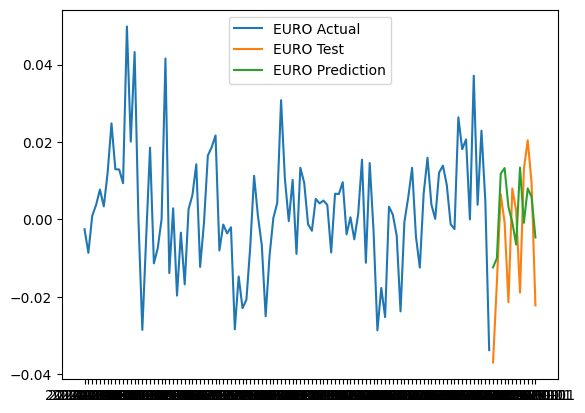

In [57]:
euro_predict_sarima = euro_sarima_fit.predict(start, end).rename('SARIMA EURO Prediction')
euro_predict_sarima_df = pd.DataFrame(euro_predict_sarima)
euro_predict_sarima_df.index = euro_predict_sarima_df.index.astype(str)
plt.plot(euro_train, label = 'EURO Actual')
plt.plot(euro_test, label = 'EURO Test')
plt.plot(euro_predict_sarima_df, label = 'EURO Prediction')
plt.legend()
plt.show()


In [58]:
mae_euro_sarima = mean_absolute_error(euro_test, euro_predict_sarima_df)
mse_euro_sarima = mean_squared_error(euro_test, euro_predict_sarima_df)
rmse_euro_sarima = np.sqrt(mean_squared_error(euro_test, euro_predict_sarima_df))
euro_perf_sarima = {'Currency':'Euro','MAE': mae_euro_sarima, 'MSE': mse_euro_sarima,
'RMSE': rmse_euro_sarima}
euro_perf_sarima = pd.DataFrame([euro_perf_sarima])
euro_perf_sarima

,Currency,MAE,MSE,RMSE
0,Euro,0.01435,0.000278,0.016687


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a good prediction that aligns with the actual data.

<b>From Performance Metrics:</b> The model has small errors `(RMSE < 0.02)` implying that the prediction is prone to very less errors.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.02788D+00    |proj g|=  1.51778D+01

At iterate    5    f= -2.07029D+00    |proj g|=  5.90624D-01


 This problem is unconstrained.



At iterate   10    f= -2.07673D+00    |proj g|=  1.17052D+00

At iterate   15    f= -2.07927D+00    |proj g|=  1.88733D-01

At iterate   20    f= -2.07959D+00    |proj g|=  2.47095D-01

At iterate   25    f= -2.08414D+00    |proj g|=  8.18753D+00

At iterate   30    f= -2.08644D+00    |proj g|=  5.18351D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     34     85      1     0     0   1.171D-01  -2.086D+00
  F =  -2.0864398297832256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


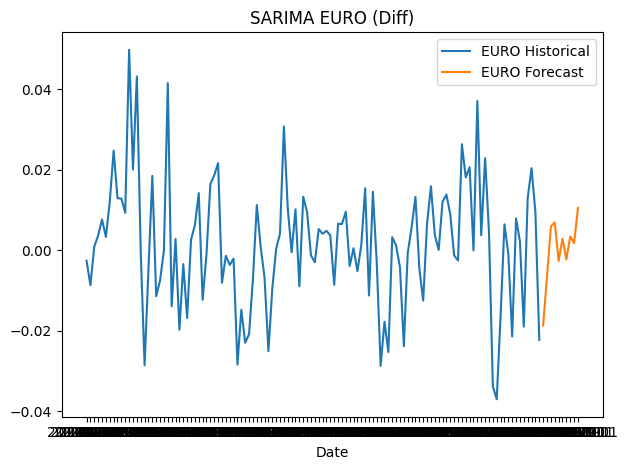

In [59]:
euro_sarima = SARIMAX(euro_df['Differenced_Data'], order = (7,0,2), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
euro_sarima_fit = euro_sarima.fit()
euro_forecast_sarima = euro_sarima_fit.forecast(steps = 10)
#euro_forecast_sarima_df = pd.DataFrame(euro_forecast_sarima)
euro_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA EURO (Diff)')
plt.plot(euro_df['Differenced_Data'], label = 'EURO Historical')
plt.plot(euro_forecast_sarima, label = 'EURO Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
euro_forecast_rates_sarima = euro_df['Exchange_rate'].iloc[-1] + euro_forecast_sarima.cumsum()
euro_forecasts2 = pd.concat([euro_df['Exchange_rate'], euro_forecast_rates_sarima], axis = 0)
euro_forecasts2.to_csv('data/euro_sarima_forecasts.csv')

In [61]:
euro_forecasts2

2014-02-01    0.731797
2014-03-01    0.723170
2014-04-01    0.724113
2014-05-01    0.727855
2014-06-01    0.735565
                ...   
2024-05-01    0.912556
2024-06-01    0.910315
2024-07-01    0.913770
2024-08-01    0.915613
2024-09-01    0.926200
Length: 128, dtype: float64

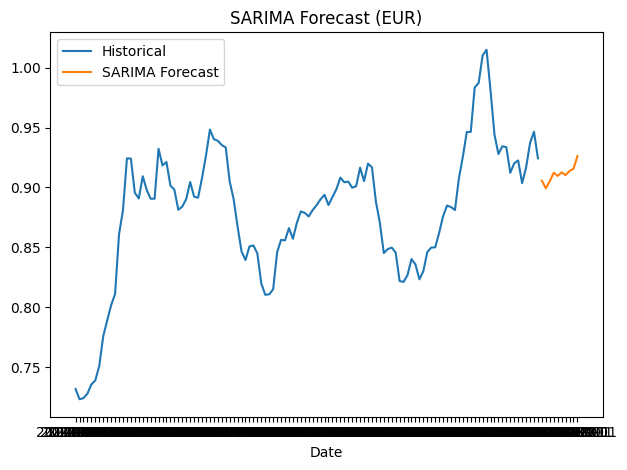

In [62]:
plt.plot(euro_df['Exchange_rate'][:], label='Historical')
plt.plot(euro_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (EUR)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/Euro ratio experiences a dip in December 2023 and then follows an ascending trend with a few dips along the way till September 2024. The USD value against Euro will slightly increase over this period.

#### UK Data

In [63]:
uk_sarima = SARIMAX(uk_train, order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
uk_sarima_fit = uk_sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93407D+00    |proj g|=  9.76504D+00

At iterate    5    f= -1.95110D+00    |proj g|=  6.82810D-02

At iterate   10    f= -1.95281D+00    |proj g|=  2.78875D+00

At iterate   15    f= -1.95493D+00    |proj g|=  1.46352D-01

At iterate   20    f= -1.95631D+00    |proj g|=  1.33429D-01

At iterate   25    f= -1.95647D+00    |proj g|=  3.83951D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     72      2     0     0   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


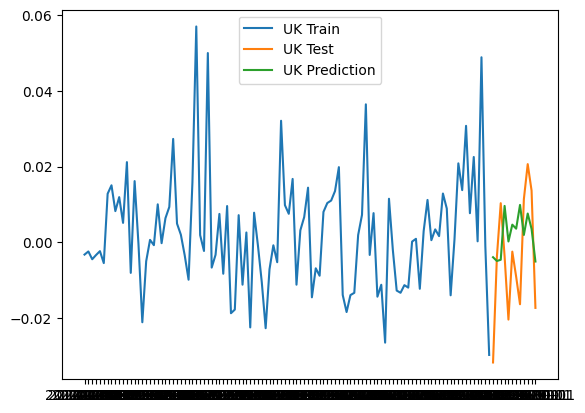

In [64]:
uk_predict_sarima = uk_sarima_fit.predict(start, end).rename('SARIMA UK Prediction')
uk_predict_sarima_df = pd.DataFrame(uk_predict_sarima)
uk_predict_sarima_df.index = uk_predict_sarima_df.index.astype(str)
plt.plot(uk_train[:split_index], label = 'UK Train')
plt.plot(uk_test, label = 'UK Test')
plt.plot(uk_predict_sarima_df, label = 'UK Prediction')
plt.legend()
plt.show()

In [65]:
mae_uk_sarima = mean_absolute_error(uk_test, uk_predict_sarima_df)
mse_uk_sarima = mean_squared_error(uk_test, uk_predict_sarima_df)
rmse_uk_sarima = np.sqrt(mean_squared_error(uk_test, uk_predict_sarima_df))
uk_perf_sarima = {'Currency':'UK Pound','MAE': mae_uk_sarima, 'MSE': mse_uk_sarima,
'RMSE': rmse_uk_sarima}
uk_perf_sarima = pd.DataFrame([uk_perf_sarima])
uk_perf_sarima

,Currency,MAE,MSE,RMSE
0,UK Pound,0.014054,0.000251,0.01584


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a prediction that aligns with the fluctuations in the actual data.

<b>From Performance Metrics:</b> The model has small errors `(RMSE < 0.02)` implying that the prediction is prone to very less errors.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.00037D+00    |proj g|=  1.08309D+01

At iterate    5    f= -2.02182D+00    |proj g|=  1.69448D-01

At iterate   10    f= -2.02405D+00    |proj g|=  4.30271D+00

At iterate   15    f= -2.03285D+00    |proj g|=  4.94317D-02

At iterate   20    f= -2.03439D+00    |proj g|=  1.40698D+00

At iterate   25    f= -2.03471D+00    |proj g|=  5.77007D-03

At iterate   30    f= -2.03536D+00    |proj g|=  1.66472D+00


 This problem is unconstrained.



At iterate   35    f= -2.03595D+00    |proj g|=  5.12367D-03

At iterate   40    f= -2.03598D+00    |proj g|=  4.31982D-02

At iterate   45    f= -2.03598D+00    |proj g|=  7.37666D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     73      1     0     0   7.377D-03  -2.036D+00
  F =  -2.0359834433553172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


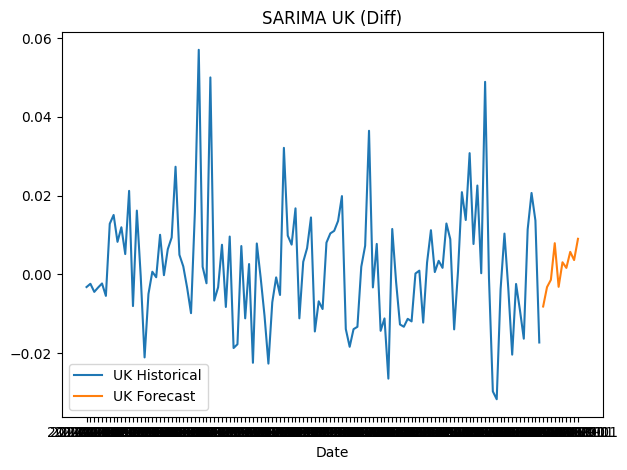

In [66]:
uk_sarima = SARIMAX(uk_df['Differenced_Data'], order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
uk_sarima_fit = uk_sarima.fit()
uk_forecast_sarima = uk_sarima_fit.forecast(steps = 10)
#uk_forecast_sarima_df = pd.DataFrame(uk_forecast_sarima)
uk_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA UK (Diff)')
plt.plot(uk_df['Differenced_Data'], label = 'UK Historical')
plt.plot(uk_forecast_sarima, label = 'UK Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
uk_forecast_rates_sarima = uk_df['Exchange_rate'].iloc[-1] + uk_forecast_sarima.cumsum()
uk_forecasts2 = pd.concat([uk_df['Exchange_rate'], uk_forecast_rates_sarima], axis = 0)
uk_forecasts2.to_csv('data/uk_sarima_forecasts.csv')

In [68]:
uk_forecasts2

2014-02-01    0.603938
2014-03-01    0.601540
2014-04-01    0.597086
2014-05-01    0.593754
2014-06-01    0.591436
                ...   
2024-05-01    0.799055
2024-06-01    0.800693
2024-07-01    0.806394
2024-08-01    0.810019
2024-09-01    0.819042
Length: 128, dtype: float64

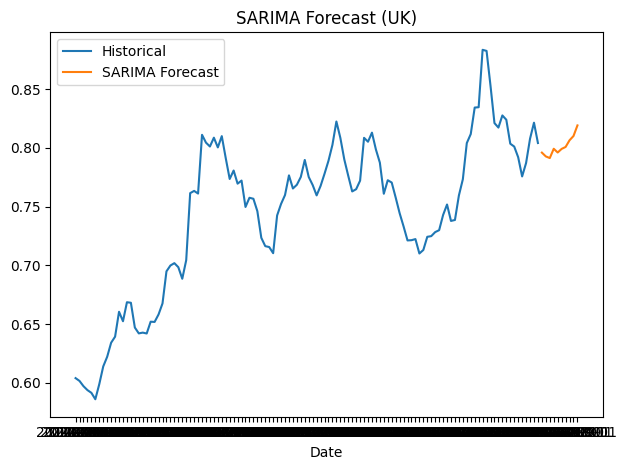

In [69]:
plt.plot(uk_df['Exchange_rate'][:], label='Historical')
plt.plot(uk_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (UK)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/GBP ratio is forecasted to have an upward climb from December 2023 with occasional insignificant dips. This implies that the USD will gain greater value over GBP in this period.

#### India Data

In [70]:
ind_sarima = SARIMAX(ind_train, order = (9,0,9), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
ind_sarima_fit = ind_sarima.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03091D+00    |proj g|=  1.75497D-01

At iterate    5    f=  9.74552D-01    |proj g|=  4.27411D-02

At iterate   10    f=  9.49059D-01    |proj g|=  5.03538D-02

At iterate   15    f=  9.34705D-01    |proj g|=  3.68767D-02

At iterate   20    f=  9.30171D-01    |proj g|=  4.16704D-02

At iterate   25    f=  9.26021D-01    |proj g|=  1.79666D-02

At iterate   30    f=  9.22959D-01    |proj g|=  5.13095D-02

At iterate   35    f=  9.18369D-01    |proj g|=  2.62684D-02

At iterate   40    f=  9.14971D-01    |proj g|=  2.28302D-02

At iterate   45    f=  9.11122D-01    |proj g|=  4.60235D-02

At iterate   50    f=  9.09097D-01    |proj g|=  6.78766D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

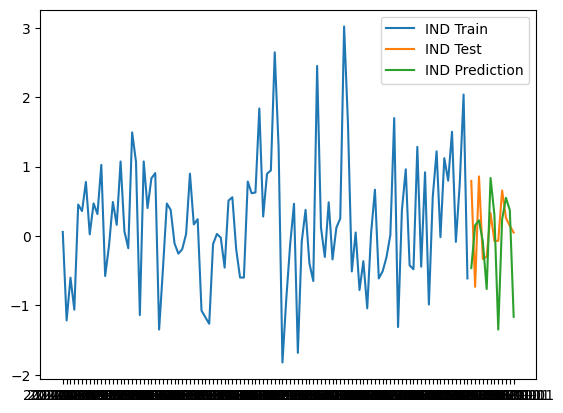

In [71]:
ind_predict_sarima = ind_sarima_fit.predict(start, end).rename('SARIMA Ind Prediction')
ind_predict_sarima_df = pd.DataFrame(ind_predict_sarima)
ind_predict_sarima_df.index = ind_predict_sarima_df.index.astype(str)
plt.plot(ind_train[:split_index], label = 'IND Train')
plt.plot(ind_test, label = 'IND Test')
plt.plot(ind_predict_sarima_df, label = 'IND Prediction')
plt.legend()
plt.show()

In [72]:
mae_ind_sarima = mean_absolute_error(ind_test, ind_predict_sarima_df)
mse_ind_sarima = mean_squared_error(ind_test, ind_predict_sarima_df)
rmse_ind_sarima = np.sqrt(mean_squared_error(ind_test, ind_predict_sarima_df))
ind_perf_sarima = {'Currency':'Indian Rupees','MAE': mae_ind_sarima, 'MSE': mse_ind_sarima,
'RMSE': rmse_ind_sarima}
ind_perf_sarima = pd.DataFrame([ind_perf_sarima])
ind_perf_sarima

,Currency,MAE,MSE,RMSE
0,Indian Rupees,0.650252,0.572051,0.75634


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a prediction that aligns with the ups and downs in the actual data.

<b>From Performance Metrics:</b> The model has significant errors `(RMSE < 0.5)` implying that the prediction is prone to errors as compared to the Euro and GBP data. However, the scale of USD/INR is greater than Euro and GBP ratios and therefore cannot be compared directly. 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14692D+00    |proj g|=  2.32346D-01

At iterate    5    f=  1.09373D+00    |proj g|=  6.50089D-03

At iterate   10    f=  1.09305D+00    |proj g|=  7.60223D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   4.157D-06   1.093D+00
  F =   1.0930477612620175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


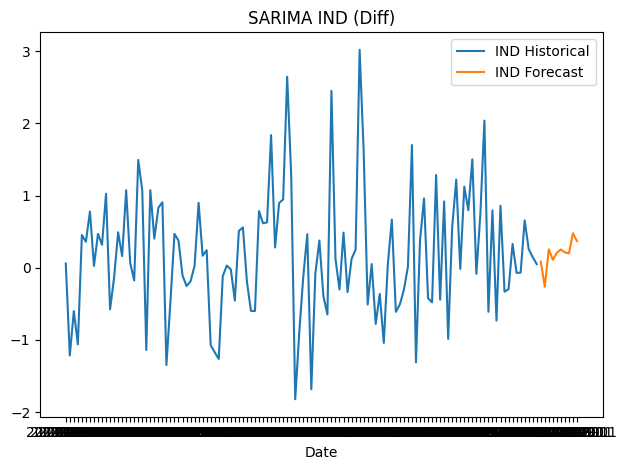

In [73]:
ind_sarima = SARIMAX(ind_df['Differenced_Data'], order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
ind_sarima_fit = ind_sarima.fit()
ind_forecast_sarima = ind_sarima_fit.forecast(steps = 10)
#ind_forecast_sarima_df = pd.DataFrame(ind_forecast_sarima)
ind_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA IND (Diff)')
plt.plot(ind_df['Differenced_Data'], label = 'IND Historical')
plt.plot(ind_forecast_sarima, label = 'IND Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
ind_forecast_rates_sarima = ind_df['Exchange_rate'].iloc[-1] + ind_forecast_sarima.cumsum()
ind_forecasts2 = pd.concat([ind_df['Exchange_rate'], ind_forecast_rates_sarima], axis = 0)
ind_forecasts2.to_csv('data/ind_sarima_forecasts.csv')

In [75]:
ind_forecasts2

2014-02-01    62.164200
2014-03-01    60.947600
2014-04-01    60.346400
2014-05-01    59.284300
2014-06-01    59.736700
                ...    
2024-05-01    83.908167
2024-06-01    84.118898
2024-07-01    84.317384
2024-08-01    84.794742
2024-09-01    85.162712
Length: 128, dtype: float64

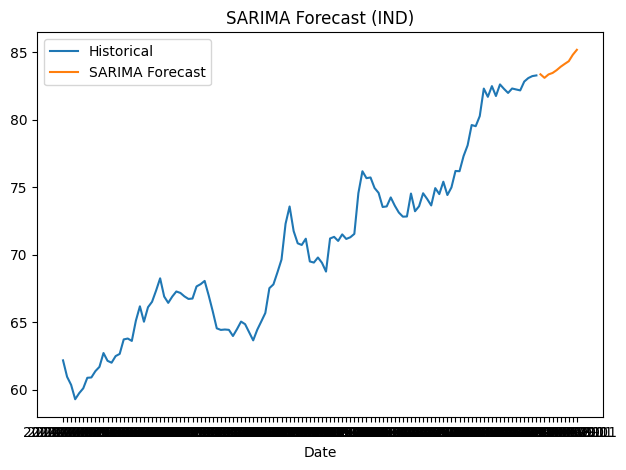

In [76]:
plt.plot(ind_df['Exchange_rate'][:], label='Historical')
plt.plot(ind_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (IND)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/INR ratio will experience a steep rise from December 2023 to September 2024 with September2024 having the greatest monetary value for USD against INR. The value is USD will be ascending throughout the period.

#### Japan Data

In [77]:
jap_sarima = SARIMAX(japan_train, order = (7,0,2), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
jap_sarima_fit = jap_sarima.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71021D+00    |proj g|=  1.12289D-01

At iterate    5    f=  1.68280D+00    |proj g|=  4.83234D-03

At iterate   10    f=  1.68262D+00    |proj g|=  6.03404D-03
  ys=-6.279E-05  -gs= 4.534E-04 BFGS update SKIPPED

At iterate   15    f=  1.68170D+00    |proj g|=  6.80725D-02

At iterate   20    f=  1.68142D+00    |proj g|=  2.74393D-02

At iterate   25    f=  1.68119D+00    |proj g|=  2.35910D-02

At iterate   30    f=  1.67863D+00    |proj g|=  7.02695D-01

At iterate   35    f=  1.67258D+00    |proj g|=  9.63803D-01

At iterate   40    f=  1.67166D+00    |proj g|=  2.46726D-01

At iterate   45    f=  1.67047D+00    |proj g|=  4.45786D-01

At iterate   50    f=  1.67011D+00    |proj g|=  9.90861D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


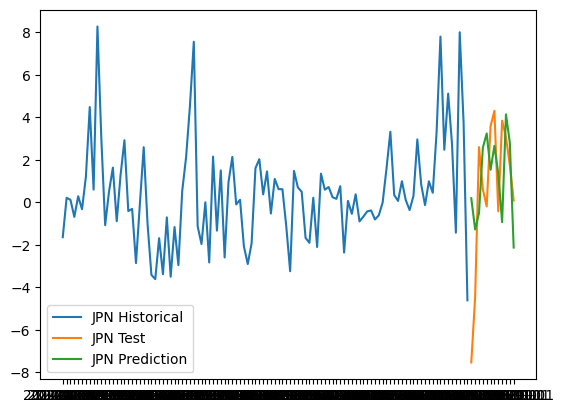

In [78]:
jap_predict_sarima = jap_sarima_fit.predict(start, end).rename('SARIMA jap Prediction')
jap_predict_sarima_df = pd.DataFrame(jap_predict_sarima)
jap_predict_sarima_df.index = jap_predict_sarima_df.index.astype(str)
plt.plot(japan_train[:split_index], label = 'JPN Historical')
plt.plot(japan_test, label = 'JPN Test')
plt.plot(jap_predict_sarima_df, label = 'JPN Prediction')
plt.legend()
plt.show()

In [79]:
mae_jap_sarima = mean_absolute_error(japan_test, jap_predict_sarima_df)
mse_jap_sarima = mean_squared_error(japan_test, jap_predict_sarima_df)
rmse_jap_sarima = np.sqrt(mean_squared_error(japan_test, jap_predict_sarima_df))
jap_perf_sarima = {'Currency':'Japanese Yen','MAE': mae_jap_sarima, 'MSE': mse_jap_sarima,
'RMSE': rmse_jap_sarima}
jap_perf_sarima = pd.DataFrame([jap_perf_sarima])
jap_perf_sarima

,Currency,MAE,MSE,RMSE
0,Japanese Yen,2.834048,11.263803,3.356159


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a prediction that aligns fluctuations in the actual data.

<b>From Performance Metrics:</b> The model has significant errors `(RMSE > 1)` implying that the prediction is not reliable and is prone to errors as compared to the Euro, GBP, and INR data. However, the scale of USD/JPY is greater than Euro and GBP ratios and therefore cannot be compared directly. 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85009D+00    |proj g|=  7.26784D-02

At iterate    5    f=  1.82217D+00    |proj g|=  1.25798D-02

At iterate   10    f=  1.82128D+00    |proj g|=  2.66260D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   2.273D-06   1.821D+00
  F =   1.8212787707171421     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


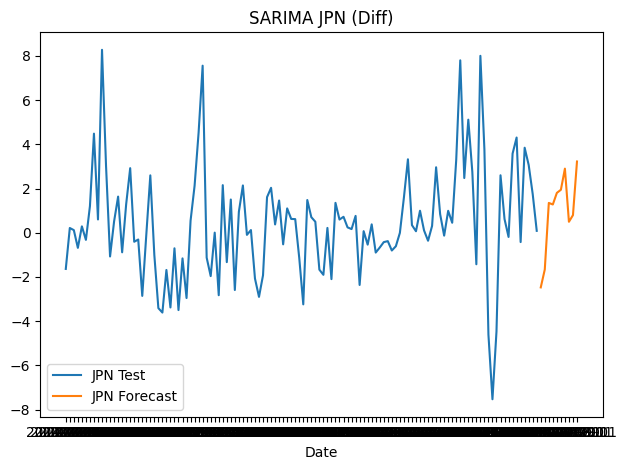

In [80]:
jap_sarima = SARIMAX(japan_df['Differenced_Data'], order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
jap_sarima_fit = jap_sarima.fit()
jap_forecast_sarima = jap_sarima_fit.forecast(steps = 10)
#jap_forecast_sarima_df = pd.DataFrame(jap_forecast_sarima)
jap_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA JPN (Diff)')
plt.plot(japan_df['Differenced_Data'], label = 'JPN Test')
plt.plot(jap_forecast_sarima, label = 'JPN Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
jap_forecast_rates_sarima = japan_df['Exchange_rate'].iloc[-1] + jap_forecast_sarima.cumsum()
japan_forecasts2 = pd.concat([japan_df['Exchange_rate'], jap_forecast_rates_sarima], axis = 0)
japan_forecasts2.to_csv('data/japan_sarima_forecasts.csv')

In [82]:
japan_forecasts2

2014-02-01    102.125300
2014-03-01    102.339500
2014-04-01    102.458200
2014-05-01    101.773800
2014-06-01    102.062900
                 ...    
2024-05-01    151.914828
2024-06-01    154.813437
2024-07-01    155.308960
2024-08-01    156.105149
2024-09-01    159.327334
Length: 128, dtype: float64

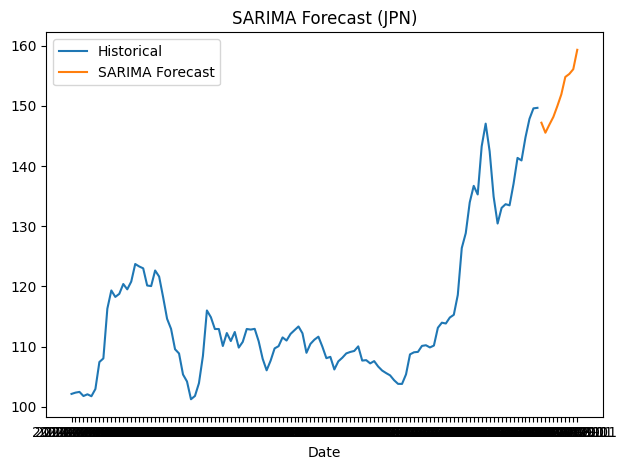

In [83]:
plt.plot(japan_df['Exchange_rate'][:], label='Historical')
plt.plot(jap_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (JPN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/JPY ratio will experience a steep rise from December 2023 to September 2024 with September 2024 having the greatest monetary value for USD against JPY. The value is USD will be ascending throughout the period.

#### China Data

In [84]:
chn_sarima = SARIMAX(chn_train, order = (1,0,0), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
chn_sarima_fit = chn_sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.73734D+00    |proj g|=  1.12967D+02

At iterate    5    f= -3.75991D+00    |proj g|=  1.55743D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     54      2     0     0   1.557D-01  -3.760D+00
  F =  -3.7599105565152384     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


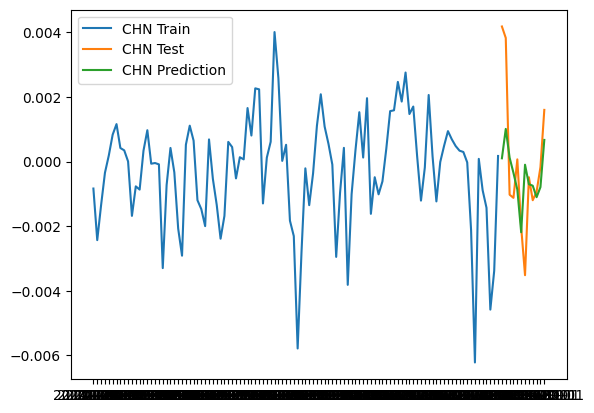

In [85]:
chn_predict_sarima = chn_sarima_fit.predict(start, end)
chn_predict_sarima_df = pd.DataFrame(chn_predict_sarima)
chn_predict_sarima_df.index = chn_predict_sarima_df.index.astype(str)
plt.plot(chn_train[:split_index], label = 'CHN Train')
plt.plot(chn_test, label = 'CHN Test')
plt.plot(chn_predict_sarima_df, label = 'CHN Prediction')
plt.legend()
plt.show()

In [86]:
mae_chn_sarima = mean_absolute_error(chn_test, chn_predict_sarima_df)
mse_chn_sarima = mean_squared_error(chn_test, chn_predict_sarima_df)
rmse_chn_sarima = np.sqrt(mean_squared_error(chn_test, chn_predict_sarima_df))
chn_perf_sarima = {'Currency':'Chinese Yuan','MAE': mae_chn_sarima, 'MSE': mse_chn_sarima,
'RMSE': rmse_chn_sarima}
chn_perf_sarima = pd.DataFrame([chn_perf_sarima])
chn_perf_sarima

,Currency,MAE,MSE,RMSE
0,Chinese Yuan,0.00131,0.000003,0.001841


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a prediction that aligns with the fluctuations in the actual data, except for the unexpected observations.

<b>From Performance Metrics:</b> The model has small errors `(RMSE < 0.002)` implying that the prediction highly reliable and not prone to much errors.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.80675D+00    |proj g|=  1.36321D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     23      1     0     0   8.924D-02  -3.844D+00
  F =  -3.8440275073050749     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


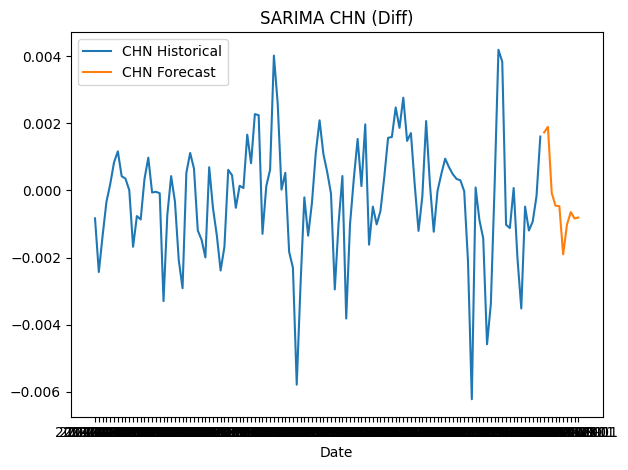

In [87]:
chn_sarima = SARIMAX(chn_df['Differenced_Data'], order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
chn_sarima_fit = chn_sarima.fit()
chn_forecast_sarima = chn_sarima_fit.forecast(steps = 10)
#chn_forecast_sarima_df = pd.DataFrame(chn_forecast_sarima)
chn_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA CHN (Diff)')
plt.plot(chn_df['Differenced_Data'], label = 'CHN Historical')
plt.plot(chn_forecast_sarima, label = 'CHN Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
chn_forecast_rates_sarima = chn_df['Exchange_rate'].iloc[-1] + chn_forecast_sarima.cumsum()
chn_forecasts2 = pd.concat([chn_df['Exchange_rate'], chn_forecast_rates_sarima], axis = 0)
chn_forecasts2.to_csv('data/chn_sarima_forecasts.csv')

In [89]:
chn_forecasts2

2014-02-01    0.164430
2014-03-01    0.161998
2014-04-01    0.160653
2014-05-01    0.160308
2014-06-01    0.160498
                ...   
2024-05-01    0.139152
2024-06-01    0.138128
2024-07-01    0.137481
2024-08-01    0.136642
2024-09-01    0.135833
Length: 128, dtype: float64

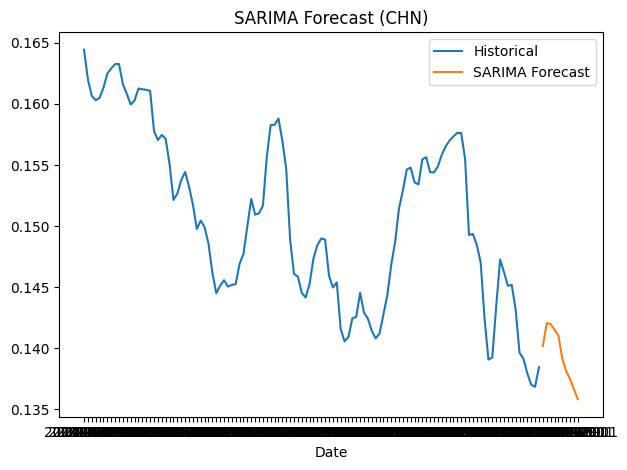

In [90]:
plt.plot(chn_df['Exchange_rate'][:], label='Historical')
plt.plot(chn_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (CHN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/CHY ratio will experience a nose dive from January 2024 to September 2024. The USD will lose its value against CHY during this period as opposed to its performance with other currencies. i.e., Chinese Yuan will be in its strong phase throughout this period and the strongest among all the currencies considered, not in terms of value.

### Summary

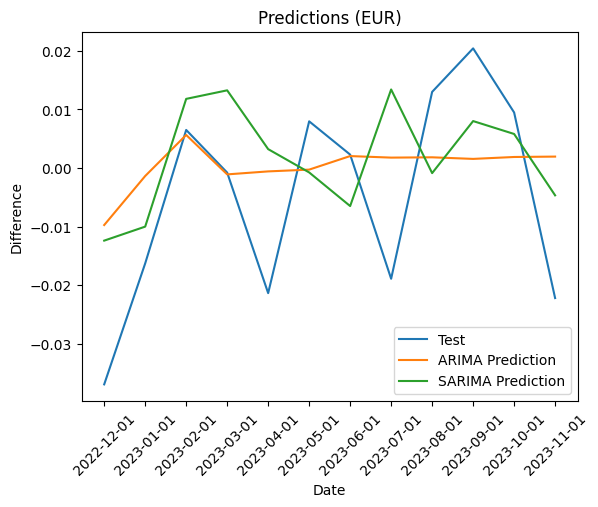

In [91]:
plt.plot(euro_test, label='Test')
plt.plot(euro_pred_df, label='ARIMA Prediction')
plt.plot(euro_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (EUR)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

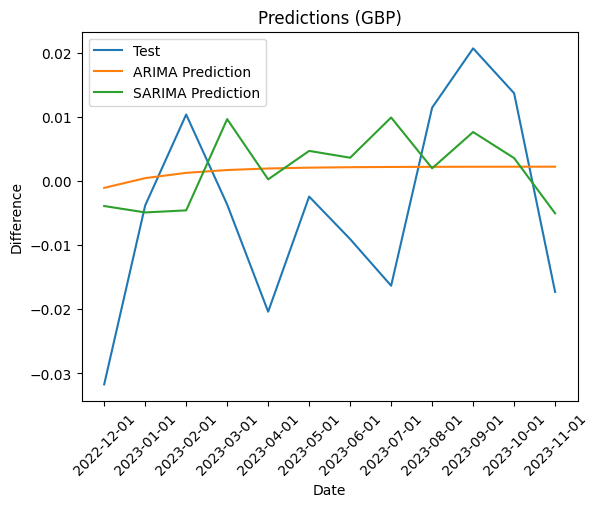

In [92]:
plt.plot(uk_test, label='Test')
plt.plot(uk_pred_df, label='ARIMA Prediction')
plt.plot(uk_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (GBP)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

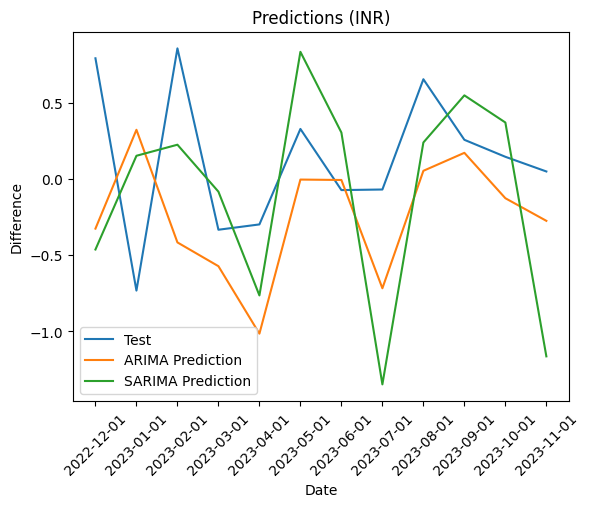

In [93]:
plt.plot(ind_test, label='Test')
plt.plot(ind_pred_df, label='ARIMA Prediction')
plt.plot(ind_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (INR)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

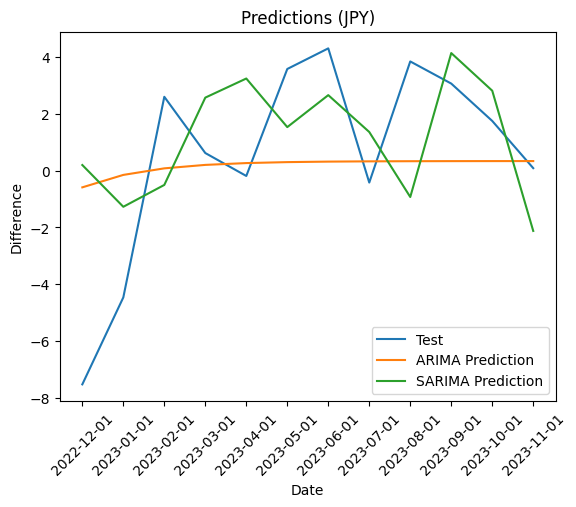

In [94]:
plt.plot(japan_test, label='Test')
plt.plot(jap_pred_df, label='ARIMA Prediction')
plt.plot(jap_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (JPY)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

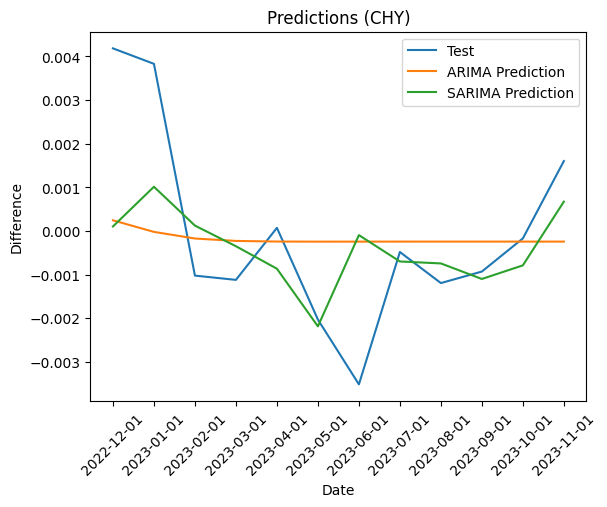

In [95]:
plt.plot(chn_test, label='Test')
plt.plot(chn_pred_df, label='ARIMA Prediction')
plt.plot(chn_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (CHY)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [96]:
arima_perf = pd.concat([euro_perf, uk_perf, ind_perf, jap_perf, chn_perf], axis = 0)
arima_perf

,Currency,MAE,MSE,RMSE
0,Euro,0.012929,0.000251,0.015857
0,UK Pound,0.013713,0.000249,0.015792
0,Indian Rupees,0.561540,0.470815,0.686160
0,Japanese Yen,2.547739,10.217898,3.196545
0,Chinese Yuan,0.001559,0.000004,0.002056


In [97]:
sarima_perf = pd.concat([euro_perf_sarima, uk_perf_sarima, ind_perf_sarima, jap_perf_sarima, chn_perf_sarima], axis = 0)
sarima_perf

,Currency,MAE,MSE,RMSE
0,Euro,0.014350,0.000278,0.016687
0,UK Pound,0.014054,0.000251,0.015840
0,Indian Rupees,0.650252,0.572051,0.756340
0,Japanese Yen,2.834048,11.263803,3.356159
0,Chinese Yuan,0.001310,0.000003,0.001841


### Performance Metrics

|ARIMA| | | |SARIMA | | ||
|--|---|---|---|---|---|---|---|
|Currency|	MAE	|MSE	|RMSE	|Currency	|MAE|	MSE	|RMSE|
|Euro	|0.012929	|0.000251|	<b>0.015857</b>	|Euro|	0.014350|	0.000278	|0.016687|
|UK Pound	|0.013713	|0.000249|	0.015792	|UK Pound|	0.014054|	0.000251|	<b>0.015840</b>|
|Indian Rupees	|0.561540|	0.470815	|<b>0.686160</b>|	Indian Rupees	|0.650252|	0.572051	|0.756340|
|Japanese Yen	|2.547739	|10.217898	|<b>3.196545</b>|	Japanese Yen	|2.834048	|11.263803|	3.356159|
|Chinese Yuan	|0.001559|	0.000004	|0.002056|	Chinese Yuan	|0.001310	|0.000003	|<b>0.001841</b>|

Based on the provided MAE, MSE, and RMSE values for ARIMA and SARIMA models for different currencies, we can interpret the performance as follows:

1. **Euro**:
   - For ARIMA: MAE = 0.012929, MSE = 0.000251, RMSE = 0.015857
   - For SARIMA: MAE = 0.014350, MSE = 0.000278, RMSE = 0.016687
   - In this case, the ARIMA model has lower MAE, MSE, and RMSE values compared to SARIMA, indicating better performance.

2. **UK Pound**:
   - For ARIMA: MAE = 0.013713, MSE = 0.000249, RMSE = 0.015792
   - For SARIMA: MAE = 0.014054, MSE = 0.000251, RMSE = 0.015840
   - Similar to the Euro, the ARIMA model outperforms SARIMA for the UK Pound based on lower MAE, MSE, and RMSE.

3. **Indian Rupees**:
   - For ARIMA: MAE = 0.561540, MSE = 0.470815, RMSE = 0.686160
   - For SARIMA: MAE = 0.650252, MSE = 0.572051, RMSE = 0.756340
   - In this case, both models have relatively high error metrics, but ARIMA performs slightly better based on lower MAE, MSE, and RMSE.

4. **Japanese Yen**:
   - For ARIMA: MAE = 2.547739, MSE = 10.217898, RMSE = 3.196545
   - For SARIMA: MAE = 2.834048, MSE = 11.263803, RMSE = 3.356159
   - Similar to the Indian Rupees, both models have high error metrics, but ARIMA performs slightly better based on lower MAE, MSE, and RMSE.

5. **Chinese Yuan**:
   - For ARIMA: MAE = 0.001559, MSE = 0.000004, RMSE = 0.002056
   - For SARIMA: MAE = 0.001310, MSE = 0.000003, RMSE = 0.001841
   - ARIMA outperforms SARIMA for Chinese Yuan based on lower MAE, MSE, and RMSE.

Overall, in most cases, the ARIMA model tends to perform slightly better than the SARIMA model based on the provided error metrics. However, the performance clearly depends on the specific characteristics of each currency's exchange rate data.